In [1]:
import random
import pickle

import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms



from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





## Classes for Different MMs

In [2]:
### Perfect or Near Perfect MM

class PerfectMM:
    def __init__(self, n_players, wr=0.5, req_net_games = 40):
        ### win rate that the algorithm aims for
        self.wr = wr
        ### lose rate (?)
        self.lr = 1 - self.wr
        ### number of players involved
        self.n_players = n_players
        ### required number of net games won
        self.req_net_games = req_net_games
        
    def compute(self, save=False):
        ### compute start time
        self.start = time()
        ### number of games per player
        self.start = time()
        self.n_games_list = []
        ### win rates of all players
        self.player_wr_list = []
        
        ### record of all games by the population (eg. 1000 players)
        self.record_all = []
        
        ### save or not save the record of games
        self.save = save
        
        ### win or lose ?
        outcome_list = [1, 0]   ### 1 for WIN, 0 for DEFEAT
        
        for _ in tqdm(range(self.n_players)):
            # all games for ONE player
            all_games = []
            ### number of games played so far for each player
            n_games = 0
            ### number of net games won
            n_wins = 0
            
            while n_wins < self.req_net_games:
                ### play one game & add to n_games
                n_games += 1
                ### result of played game
                one_game = random.choices(outcome_list, weights=(self.wr, self.lr))[0]
                all_games.append(one_game)
                
                if one_game == 1:
                    n_wins += 1
                else:
                    n_wins -= 1
                    

            player_wr = sum(all_games)/len(all_games)
            self.player_wr_list.append(player_wr)
            self.n_games_list.append(n_games)
            
            ### append all games played by one player to record of all games played by population in question
            self.record_all.append(all_games)
            
           
        ### number of average games played per player
        self.n_avg_games = sum(self.n_games_list) / self.n_players
        ### average win rate
        self.avg_wr = sum(self.player_wr_list) / self.n_players
        ### compute end time
        self.end = time()
        ### compute duration
        self.compute_time = self.end - self.start
        
        
        ### save or not save record of all games by all players 
        if self.save is False:
            self.filename = f'No saved files created'
            pass
        else:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            self.filename = f'saved_lists/perfectmm_{timestamp}.txt'
            with open(self.filename, 'wb') as file:
                pickle.dump(self.record_all, file)
                
                
            
        
    def report(self):
        print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
        print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
        print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
        print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
        print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
        print(f'Saved Result(filename): {self.filename} \n')

In [3]:
# ### Streak MM

# class StreakMM:
#     def __init__(self, n_players, req_net_games = 40):
#         ### number of players involved
#         self.n_players = n_players
#         ### required number of net games won
#         self.req_net_games = req_net_games
        
        
        
        
#     def compute(self, wsr=0.5, wlr=0.85, n_streak=6, bottom=True, n_bottom=0, save=False):
#         ### compute start time
#         self.start = time()
        
#         ### number of games per player
#         self.n_games_list = []
        
#         ### win rates of all players
#         self.player_wr_list = []
        
#         ### record of all games by the population (eg. 1000 players)
#         self.record_all = []
        
#         ### save or not save the record of games
#         self.save = save
        
#         ### streak probabilities
#         self.wsr = wsr
#         self.lsr = 1 - self.wsr
        
#         ### number of games per streak
#         self.n_streak = n_streak
        
#         ### win or lose rate per streak
#         self.wlr = wlr
        
#         ### bottom net games won
#         self.bottom = bottom
        
#         ### threshold for bottom net games won
#         self.n_bottom = n_bottom
        
#         ### Two types of streaks
#         streak_list = ['WS', 'LS']
#         ### win or lose ?
#         outcome_list = [1, 0]
        
#         for _ in tqdm(range(self.n_players)):
#             # all games for ONE player
#             all_games = []
#             ### number of games played so far for each player
#             n_games = 0
#             ### number of net games won
#             n_wins = 0
                    
#             while n_wins < self.req_net_games:
#                 ### random select one streak
#                 one_streak = random.choices(streak_list, weights=(self.wsr, self.lsr))[0]
#                 ### add number of games of streak to number of games played
#                 n_games += self.n_streak
                
#                 ### if WS (win streak)
#                 if one_streak == "WS":
#                     wr = self.wlr
#                     lr = 1-self.wlr
                
#                     ### randomly pick streak results given which streak
#                     streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
#                     all_games.extend(streak_result)
                    
#                     for wl in streak_result:
#                         if wl == 1:
#                             n_wins += 1
#                         else:
#                             n_wins -= 1
                
#                 ### if LS (Losing Streak)
#                 else:
#                     wr = 1-self.wlr
#                     lr = self.wlr
                    
#                     ### randomly pick streak results given which streak
#                     streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
#                     all_games.extend(streak_result)
                    
#                     for wl in streak_result:
#                         if wl == 1:
#                             n_wins += 1
#                         else:
#                             if self.bottom == False:
#                                 n_wins -= 1
#                             else:
#                                 if n_wins < 0:
#                                     n_wins = abs(self.n_bottom) * (-1)
            
#             ### calculate and organize result
#             # victory = 0
#             # defeat = 0
            
#             # for game in all_games:
#             #     if game == "W":
#             #         victory += 1
#             #     else:
#             #         defeat += 1
                
#             self.n_games_list.append(n_games)
#             player_wr = sum(all_games)/len(all_games)
#             self.player_wr_list.append(player_wr)
            
#             ### append all games played by one player to record of all games played by population in question
#             self.record_all.append(all_games)
                
                
#         ### number of average games played per player
#         self.n_avg_games = sum(self.n_games_list) / self.n_players
#         ### average win rate
#         self.avg_wr = sum(self.player_wr_list) / self.n_players
        
#         ### compute end time
#         self.end = time()
#         ### compute duration
#         self.compute_time = self.end - self.start
        
#         ### save or not save record of all games by all players 
#         if self.save is False:
#             self.filename = f'No saved files created'
#             pass
#         else:
#             timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
#             self.filename = f'saved_lists/streakmm_{timestamp}.txt'
#             with open(self.filename, 'wb') as file:
#                 pickle.dump(self.record_all, file)
            
        
#     def report(self):
#         print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
#         print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
#         print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
#         print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
#         print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
#         print(f'Saved Result(filename): {self.filename} \n')
        
        
    
        
        

In [4]:
### Streak MM

class StreakMM:
    def __init__(self, n_players, req_net_games = 40):
        ### number of players involved
        self.n_players = n_players
        ### required number of net games won
        self.req_net_games = req_net_games
        
        
        
        
    def compute(self, wsr=0.5, wlr=0.85, n_streak=6, bottom=True, n_bottom=0, save=False):
        ### compute start time
        self.start = time()
        
        ### number of games per player
        self.n_games_list = []
        
        ### win rates of all players
        self.player_wr_list = []
        
        ### record of all games by the population (eg. 1000 players)
        self.record_all = []
        
        ### save or not save the record of games
        self.save = save
        
        ### streak probabilities
        self.wsr = wsr
        self.lsr = 1 - self.wsr
        
        ### number of games per streak
        self.n_streak = n_streak
        
        ### win or lose rate per streak
        self.wlr = wlr
        
        ### bottom net games won
        self.bottom = bottom
        
        ### threshold for bottom net games won
        self.n_bottom = n_bottom
        
        ### Two types of streaks
        streak_list = ['WS', 'LS']
        ### win or lose ?
        outcome_list = [1, 0]
        
        for _ in tqdm(range(self.n_players)):
            # all games for ONE player
            all_games = []
            ### number of games played so far for each player
            n_games = 0
            ### number of net games won
            n_wins = 0
                    
            while n_wins < self.req_net_games:
                ### random select one streak
                one_streak = random.choices(streak_list, weights=(self.wsr, self.lsr))[0]
                ### add number of games of streak to number of games played
                n_games += self.n_streak
                
                ### if WS (win streak)
                if one_streak == "WS":
                    wr = self.wlr
                    lr = 1-self.wlr
                
                    ### randomly pick streak results given which streak
                    streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
                    all_games.extend(streak_result)
                    
                    for wl in streak_result:
                        if wl == 1:
                            n_wins += 1
                        else:
                            n_wins -= 1
                
                ### if LS (Losing Streak)
                else:
                    wr = 1-self.wlr
                    lr = self.wlr
                    
                    ### randomly pick streak results given which streak
                    streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
                    all_games.extend(streak_result)
                    
                    for wl in streak_result:
                        if wl == 1:
                            n_wins += 1
                        else:
                            n_wins -= 1
                            if self.bottom == True:
                                if n_wins < abs(self.n_bottom) * (-1):
                                    n_wins = abs(self.n_bottom) * (-1)
                                else:
                                    pass
                            else:
                                pass
                            
                            
#                             if self.bottom == False:
#                                 n_wins -= 1
#                             else:
#                                 n_wins
#                                 if n_wins < 0:
#                                     n_wins = abs(self.n_bottom) * (-1)
            
            ### calculate and organize result
            # victory = 0
            # defeat = 0
            
            # for game in all_games:
            #     if game == "W":
            #         victory += 1
            #     else:
            #         defeat += 1
                
            self.n_games_list.append(n_games)
            player_wr = sum(all_games)/len(all_games)
            self.player_wr_list.append(player_wr)
            
            ### append all games played by one player to record of all games played by population in question
            self.record_all.append(all_games)
                
                
        ### number of average games played per player
        self.n_avg_games = sum(self.n_games_list) / self.n_players
        ### average win rate
        self.avg_wr = sum(self.player_wr_list) / self.n_players
        
        ### compute end time
        self.end = time()
        ### compute duration
        self.compute_time = self.end - self.start
        
        ### save or not save record of all games by all players 
        if self.save is False:
            self.filename = f'No saved files created'
            pass
        else:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            self.filename = f'saved_lists/streakmm_{timestamp}.txt'
            with open(self.filename, 'wb') as file:
                pickle.dump(self.record_all, file)
            
        
    def report(self):
        print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
        print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
        print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
        print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
        print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
        print(f'Saved Result(filename): {self.filename} \n')
        
        
    
        
        

## Experiments

In [5]:
### number of net games required
net_games_required = 40

### PerfectMM 

In [6]:
paul_perfectmm = PerfectMM(1)
print(paul_perfectmm)
print(paul_perfectmm.wr)
print(paul_perfectmm.n_players)
paul_perfectmm.compute()
# paul_perfectmm.compute(save=True)

0.5
1


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 199.83it/s]


In [7]:
paul_perfectmm.report()

List of No. of Games Played(n_games_list): [2608] 

Number of Average Games Played(n_avg_games): 2608.0 

Win Rates of Players(player_wr_list): [0.5076687116564417] 

Average Win Rate(avg_wr): 0.5076687116564417 

Compute Time(compute_time): 0.019570112228393555 seconds 

Saved Result(filename): No saved files created 



In [25]:
five_perfectmm = PerfectMM(5)
print(five_perfectmm)
print(five_perfectmm.wr)
print(five_perfectmm.n_players)
five_perfectmm.compute()
# paul_perfectmm.compute(save=True)

0.5
5


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.77it/s]


In [26]:
five_perfectmm.report()

List of No. of Games Played(n_games_list): [13998, 2746, 58646, 80760, 11774] 

Number of Average Games Played(n_avg_games): 33584.8 

Win Rates of Players(player_wr_list): [0.5014287755393627, 0.5072833211944647, 0.5003410292262047, 0.5002476473501734, 0.5016986580601325] 

Average Win Rate(avg_wr): 0.5021998862740676 

Compute Time(compute_time): 0.26833558082580566 seconds 

Saved Result(filename): No saved files created 



In [10]:
### 100 players SIM 1
### set random seed
random.seed(15)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.77it/s]


In [11]:
hund_player_perfectmm.n_avg_games

171217.28

In [12]:
### 100 players SIM 2
### set random seed
random.seed(887)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.24it/s]


In [13]:
hund_player_perfectmm.n_avg_games

281155.04

In [14]:
### 100 players SIM 3
### set random seed
random.seed(111)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:21<00:00,  2.02s/it]


In [15]:
hund_player_perfectmm.n_avg_games

1317947.52

In [16]:
### 100 players SIM 4
### set random seed
random.seed(444)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.23it/s]


In [17]:
hund_player_perfectmm.n_avg_games

80800.44

In [18]:
### 100 players SIM 5
### set random seed
random.seed(5687)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:20<00:00,  1.24it/s]


In [19]:
hund_player_perfectmm.n_avg_games

510054.92

### NearPerfectMM 

In [20]:
paul_nearperfectmm = PerfectMM(5, wr = 0.501)
print(paul_nearperfectmm)
print(paul_nearperfectmm.wr)
print(paul_nearperfectmm.n_players)
paul_nearperfectmm.compute()
# paul_perfectmm.compute(save=True)

0.501
5


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.49it/s]


In [21]:
paul_nearperfectmm.report()

List of No. of Games Played(n_games_list): [3114, 70772, 47508, 734, 1526] 

Number of Average Games Played(n_avg_games): 24730.8 

Win Rates of Players(player_wr_list): [0.506422607578677, 0.5002825976374837, 0.500420981729393, 0.5272479564032697, 0.5131061598951507] 

Average Win Rate(avg_wr): 0.5094960606487948 

Compute Time(compute_time): 0.19717955589294434 seconds 

Saved Result(filename): No saved files created 



In [22]:
# len(paul_nearperfectmm.record_all[0])
len(paul_nearperfectmm.record_all[0])

3114

In [23]:
len_records = []
for item in paul_nearperfectmm.record_all:
    len_records.append(len(item))
    


In [ ]:
# plt.hist(record_lengths, color='lightgreen', ec='black', bins=15)
# plt.show()

In [ ]:
# plt.hist(record_lengths, color='lightgreen', ec='black', bins=15)
# plt.scatter(100,10, color='red')
# plt.show()

In [28]:
### 1000 players SIM 1
### set random seed
random.seed(15)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 35.20it/s]


18418.308

In [29]:
### 1000 players SIM 2
### set random seed
random.seed(25)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.66it/s]


22503.716

In [30]:
### 1000 players SIM 3
### set random seed
random.seed(76)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.19it/s]


22175.482

In [31]:
### 1000 players SIM 4
### set random seed
random.seed(109)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.07it/s]


16525.418

In [32]:
### 1000 players SIM 5
### set random seed
random.seed(765)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.02it/s]


21449.316

#### NearPerfectMM with range of Win Rates 

In [33]:
# wr_list = [0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
wr_list = np.arange(0.501, 0.601, 0.001)

In [34]:
random.seed(200)

n_avg_games_list = []
len_per_wr = []
for wr in wr_list:
    print(f'wr : {wr}')
    record_lengths = []
    thous_player_perfectmm = PerfectMM(1000, wr = wr)
    print(thous_player_perfectmm)
    thous_player_perfectmm.compute()
    thous_player_perfectmm.n_avg_games
    n_avg_games_list.append(thous_player_perfectmm.n_avg_games)
    
    for item in thous_player_perfectmm.record_all:
        record_lengths.append(len(item))
        
    len_per_wr.append(record_lengths)

wr : 0.501


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:28<00:00, 34.57it/s]


wr : 0.502


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 52.65it/s]


wr : 0.503


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.66it/s]


wr : 0.504


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 119.79it/s]


wr : 0.505


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.26it/s]


wr : 0.506


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.31it/s]


wr : 0.507


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 195.35it/s]


wr : 0.508


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 229.26it/s]


wr : 0.509


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 249.01it/s]


wr : 0.51


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 282.97it/s]


wr : 0.511


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.67it/s]


wr : 0.512


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.75it/s]


wr : 0.513


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 382.27it/s]


wr : 0.514


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 421.78it/s]


wr : 0.515


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 425.71it/s]


wr : 0.516


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 470.39it/s]


wr : 0.517


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 484.02it/s]


wr : 0.518


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 518.70it/s]


wr : 0.519


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 544.07it/s]


wr : 0.52


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 606.45it/s]


wr : 0.521


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 621.51it/s]


wr : 0.522


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 650.62it/s]


wr : 0.523


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 698.81it/s]


wr : 0.524


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 697.39it/s]


wr : 0.525


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 738.54it/s]


wr : 0.526


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 744.04it/s]


wr : 0.527


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 825.92it/s]


wr : 0.528


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 850.28it/s]


wr : 0.529


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 834.04it/s]


wr : 0.53


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 871.94it/s]


wr : 0.531


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 932.74it/s]


wr : 0.532


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 910.69it/s]


wr : 0.533


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 961.61it/s]


wr : 0.534


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 990.20it/s]


wr : 0.535


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1022.44it/s]


wr : 0.536


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1083.53it/s]


wr : 0.537


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1080.64it/s]


wr : 0.538


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1113.82it/s]


wr : 0.539


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1144.44it/s]


wr : 0.54


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1137.92it/s]


wr : 0.541


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1193.66it/s]


wr : 0.542


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1225.88it/s]


wr : 0.543


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1242.65it/s]


wr : 0.544


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1290.82it/s]


wr : 0.545


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1312.87it/s]


wr : 0.546


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1377.09it/s]


wr : 0.547


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1219.50it/s]


wr : 0.548


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1311.14it/s]


wr : 0.549


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1372.46it/s]


wr : 0.55


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1451.62it/s]


wr : 0.551


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1430.72it/s]


wr : 0.552


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1449.24it/s]


wr : 0.553


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1474.79it/s]


wr : 0.554


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1522.19it/s]


wr : 0.555


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1517.57it/s]


wr : 0.556


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1545.52it/s]


wr : 0.557


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1560.22it/s]


wr : 0.558


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1564.89it/s]


wr : 0.559


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1633.99it/s]


wr : 0.56


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1610.52it/s]


wr : 0.561


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1751.15it/s]


wr : 0.562


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1709.47it/s]


wr : 0.5630000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1751.43it/s]


wr : 0.5640000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1795.50it/s]


wr : 0.5650000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1772.90it/s]


wr : 0.5660000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1862.43it/s]


wr : 0.5670000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1811.47it/s]


wr : 0.5680000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1879.63it/s]


wr : 0.5690000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1879.96it/s]


wr : 0.5700000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1919.35it/s]


wr : 0.5710000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2000.04it/s]


wr : 0.5720000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2004.05it/s]


wr : 0.5730000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2032.20it/s]


wr : 0.5740000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2053.87it/s]


wr : 0.5750000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2087.80it/s]


wr : 0.5760000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2132.37it/s]


wr : 0.5770000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2105.00it/s]


wr : 0.5780000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2193.22it/s]


wr : 0.5790000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2231.96it/s]


wr : 0.5800000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2193.21it/s]


wr : 0.5810000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2272.58it/s]


wr : 0.5820000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2164.28it/s]


wr : 0.5830000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2304.51it/s]


wr : 0.5840000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2212.20it/s]


wr : 0.5850000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2433.62it/s]


wr : 0.5860000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2369.60it/s]


wr : 0.5870000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2431.43it/s]


wr : 0.5880000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2424.99it/s]


wr : 0.5890000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2503.99it/s]


wr : 0.5900000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2460.82it/s]


wr : 0.5910000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2529.35it/s]


wr : 0.5920000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2510.28it/s]


wr : 0.5930000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2664.25it/s]


wr : 0.5940000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2643.10it/s]


wr : 0.5950000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2685.73it/s]


wr : 0.5960000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2722.32it/s]


wr : 0.5970000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2685.73it/s]


wr : 0.5980000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2767.57it/s]


wr : 0.5990000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2838.33it/s]


wr : 0.6000000000000001


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2759.93it/s]


In [35]:
# len(len_per_wr)
len(len_per_wr[1])

1000

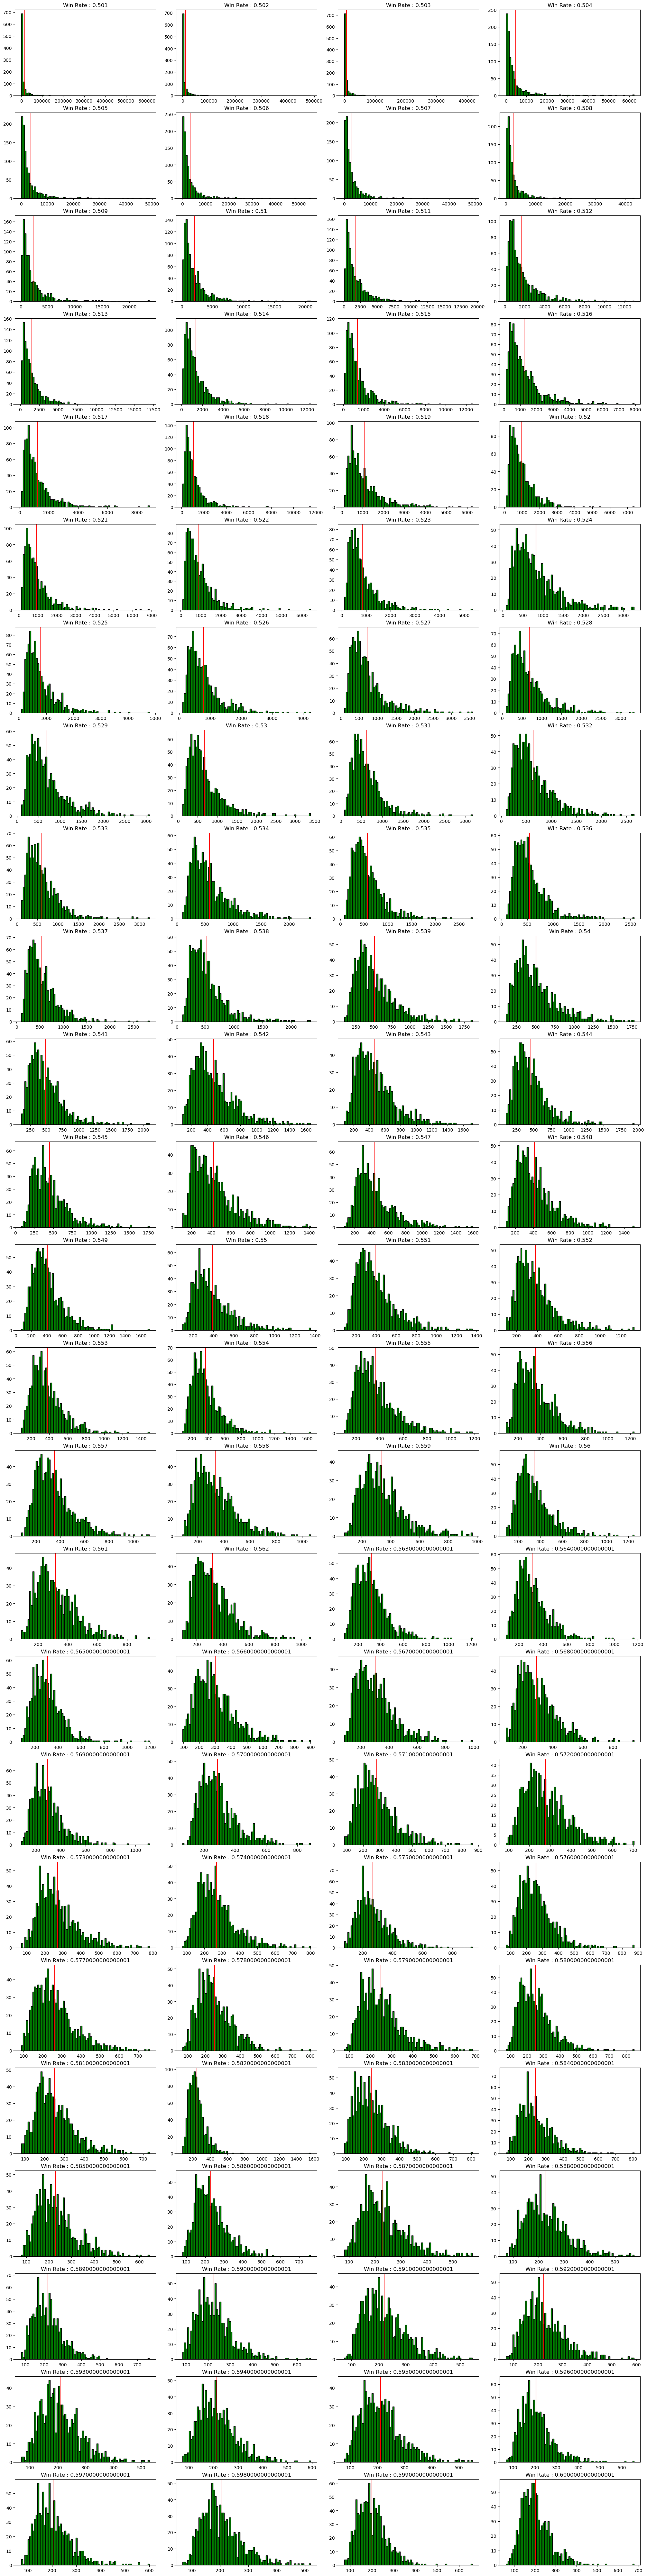

In [36]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].hist(len_per_wr[ind], color='green', ec='black', bins=80)
        axs[i, j].axvline(np.mean(len_per_wr[i*ccols + j]), color='r')
        # axs[i, j].axvline(max(set(len_per_wr[i*ccols + j]), key=len_per_wr[i*ccols + j].count), color='gold')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

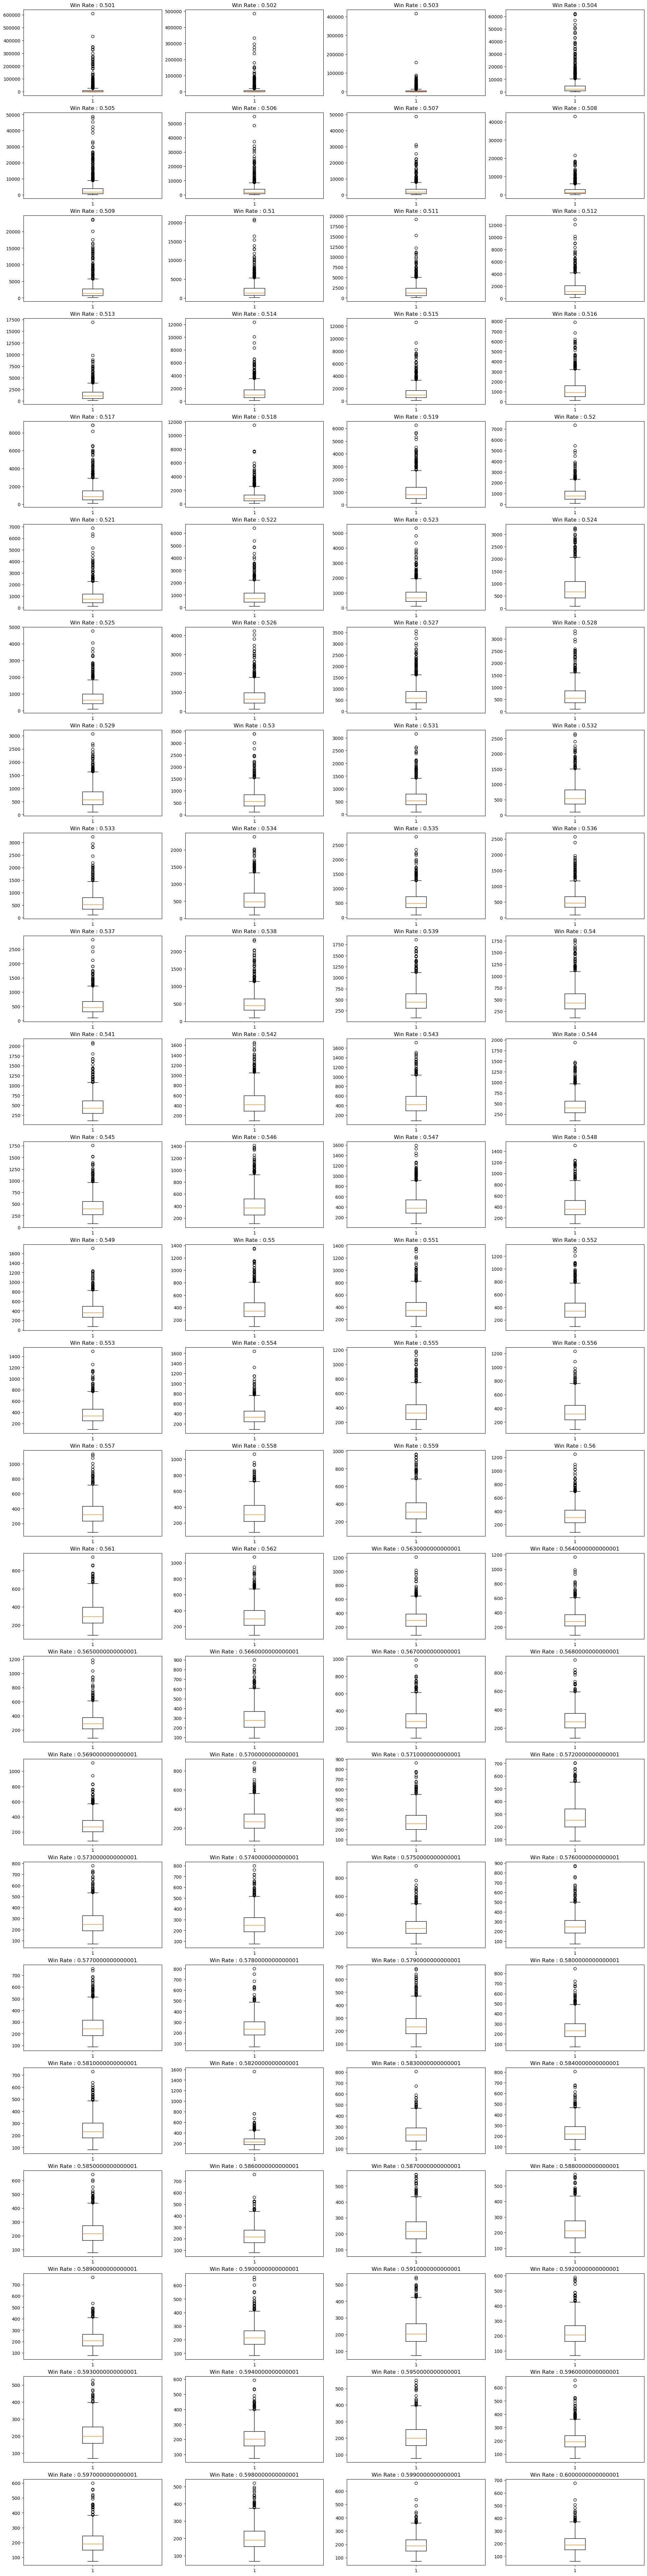

In [37]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].boxplot(len_per_wr[ind])
        # axs[i, j].axvline(np.mean(len_per_wr[i*ccols + j]), color='r')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

In [38]:
new_len_per_wr = len_per_wr.copy()
for rec_lens in new_len_per_wr:
    for item in rec_lens:
        # if item >= 9000:
        if item >= 3000:
            rec_lens.remove(item)



In [39]:
# for item in new_len_per_wr:
#     print(len(item))

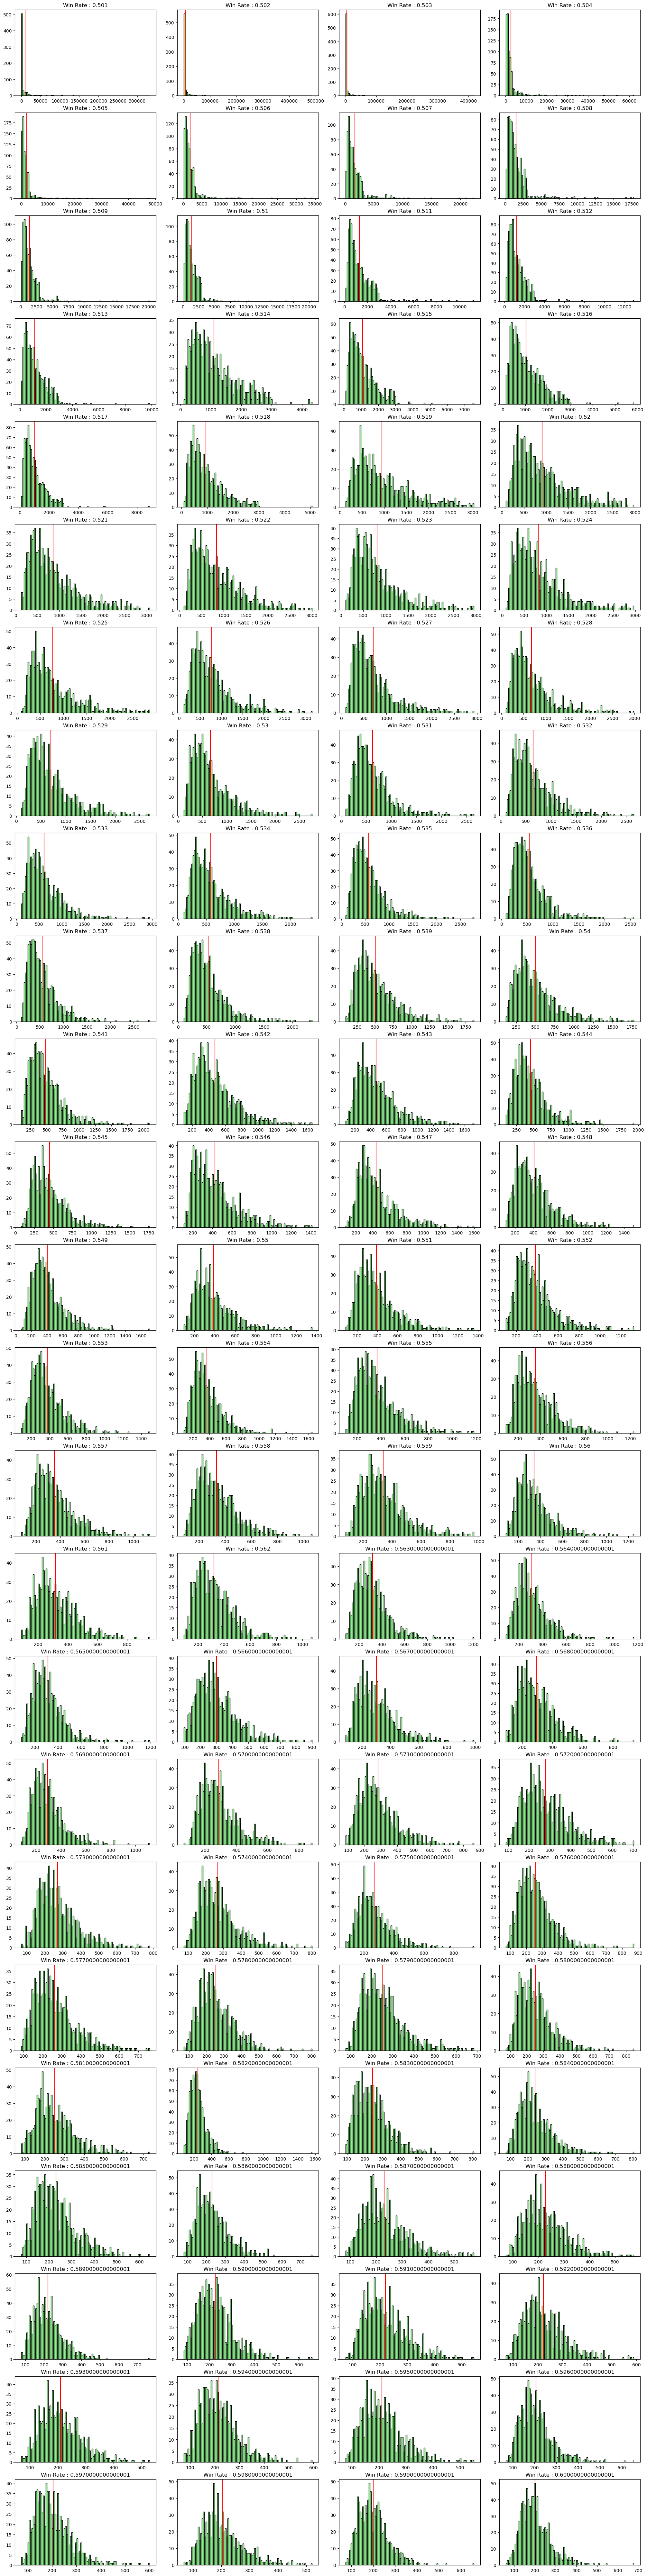

In [40]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].hist(new_len_per_wr[ind], color='lightgreen', ec='black', bins=100)
        axs[i, j].axvline(np.mean(new_len_per_wr[i*ccols + j]), color='r')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

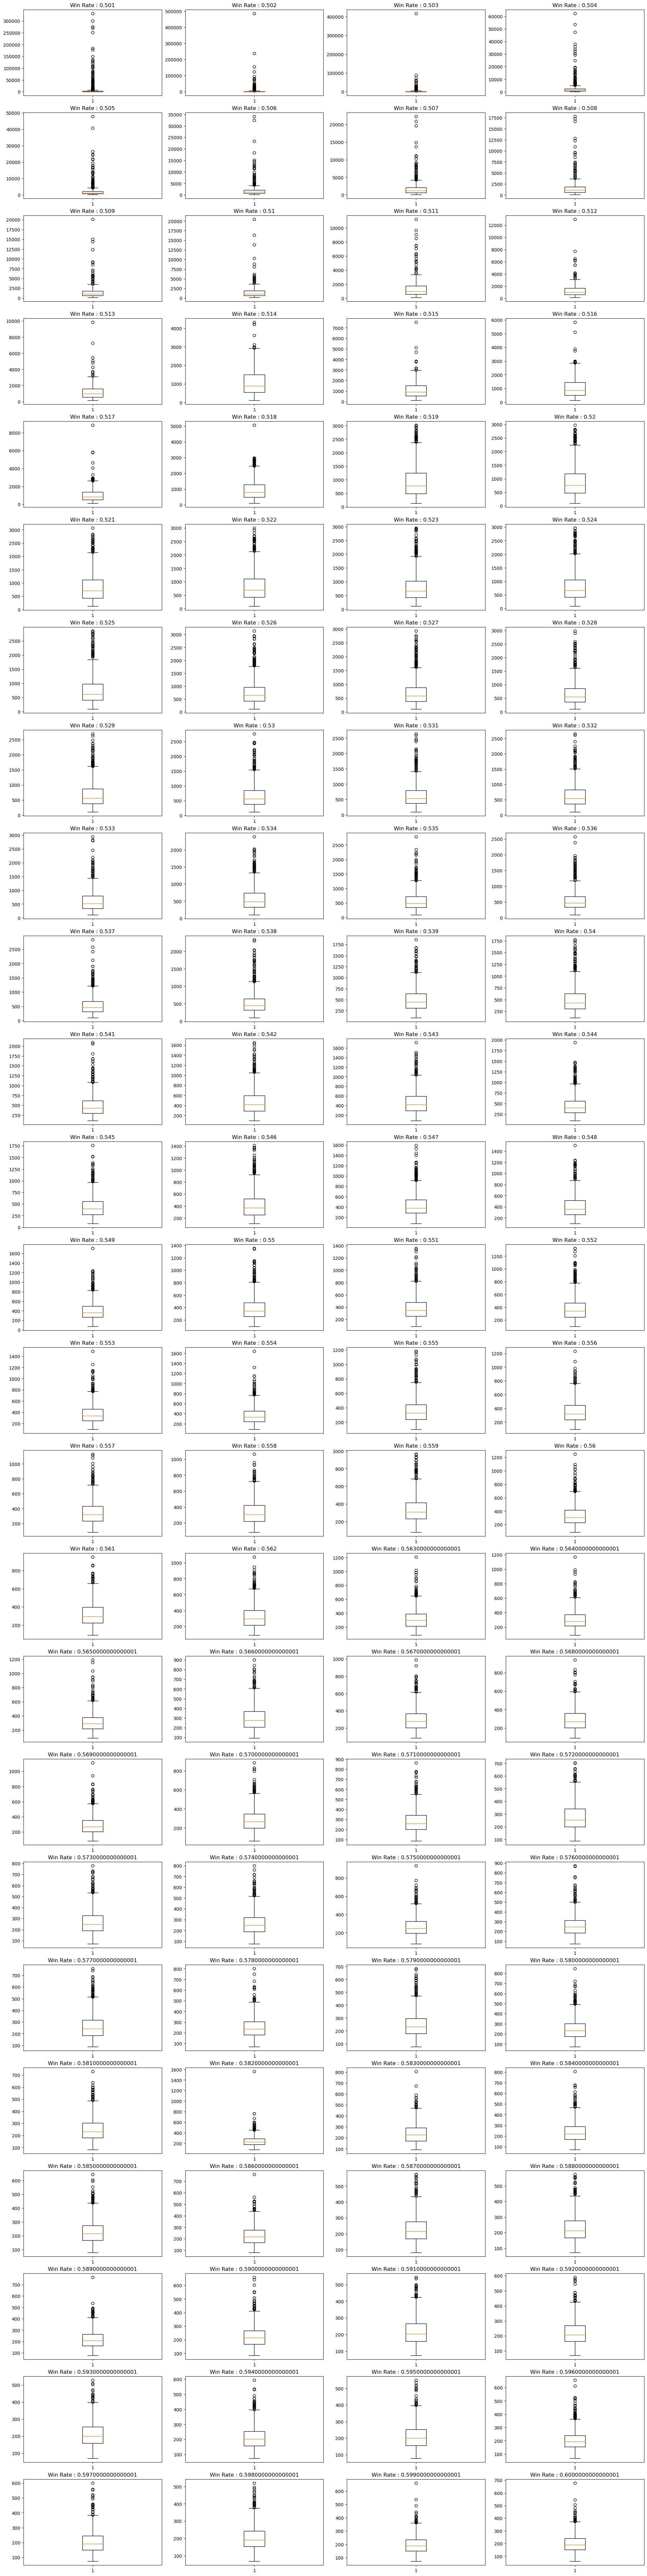

In [41]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].boxplot(new_len_per_wr[ind])
        # axs[i, j].axvline(np.mean(len_per_wr[i*ccols + j]), color='r')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

In [42]:
len(n_avg_games_list)

100

In [43]:
# n_avg_games_list

In [44]:
# plt.plot(wr_list, n_avg_games_list, linestyle='--')
# plt.title('Avg Number of Games Played per Win Rate')
# plt.xlabel('Win Rate')
# plt.ylabel('Avg Number of Games Played')

# ### draw horizontal lines
# plt.axhline(18000, color='r')
# plt.axhline(9000, color='r')
# plt.axhline(6000, color='r')



# plt.show()

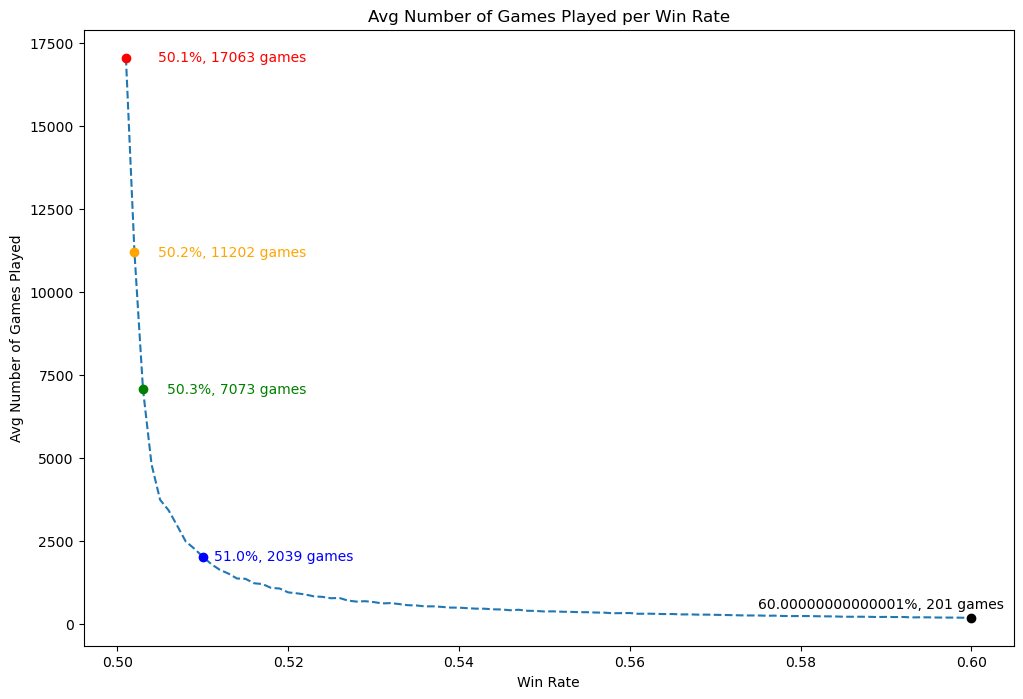

In [45]:
# https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Avg Number of Games Played per Win Rate')
ax.set_xlabel('Win Rate')
ax.set_ylabel('Avg Number of Games Played')

ax.plot(wr_list, n_avg_games_list, linestyle='--')
# ax.axhline(18000, color="red")
# ax.axhline(9000, color="orange")
# ax.axhline(6000, color="green")

# ax.axvline(wr_list[0], color='red')
# ax.axvline(wr_list[1], color='orange')
# ax.axvline(wr_list[2], color='green')

ax.plot(wr_list[0], int(n_avg_games_list[0]), color='red', marker='o')
ax.plot(wr_list[1], int(n_avg_games_list[1]), color='orange', marker='o')
ax.plot(wr_list[2], int(n_avg_games_list[2]), color='green', marker='o')
ax.plot(wr_list[9], int(n_avg_games_list[9]), color='blue', marker='o')
ax.plot(wr_list[-1], int(n_avg_games_list[-1]), color='black', marker='o')
# ax.plot(wr_list[1], color='orange')
# ax.plot(wr_list[2], color='green')

# Here: add a new tick with the required value
# xticks = [*ax.get_xticks(), wr_list[0], wr_list[1], wr_list[2]]
# xticklabels = [*ax.get_xticklabels(),wr_list[0], wr_list[1], wr_list[2]]

# yticks = [*ax.get_yticks(), 9000]
# yticklabels = [*ax.get_yticklabels(), int(9000)]
# ax.set_yticks(yticks, labels=yticklabels)

trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)

# ax.text(0, 9000, '9000', color='red')
ax.text(0.25, int(n_avg_games_list[0]), f"{wr_list[0]*100}%, {int(n_avg_games_list[0])} games", color="red", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[1]), f"{wr_list[1]*100}%, {int(n_avg_games_list[1])} games", color="orange", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[2]), f"{wr_list[2]*100}%, {int(n_avg_games_list[2])} games", color="green", transform=trans, ha="right", va="center")
ax.text(0.3, int(n_avg_games_list[9]), f"{wr_list[9]*100}%, {int(n_avg_games_list[9])} games", color="blue", transform=trans, ha="right", va="center")
ax.text(1, 600, f"{wr_list[-1]*100}%, {int(n_avg_games_list[-1])} games", color="black", transform=trans, ha="right", va="center")




plt.show()


In [46]:
wr_list

array([0.501, 0.502, 0.503, 0.504, 0.505, 0.506, 0.507, 0.508, 0.509,
       0.51 , 0.511, 0.512, 0.513, 0.514, 0.515, 0.516, 0.517, 0.518,
       0.519, 0.52 , 0.521, 0.522, 0.523, 0.524, 0.525, 0.526, 0.527,
       0.528, 0.529, 0.53 , 0.531, 0.532, 0.533, 0.534, 0.535, 0.536,
       0.537, 0.538, 0.539, 0.54 , 0.541, 0.542, 0.543, 0.544, 0.545,
       0.546, 0.547, 0.548, 0.549, 0.55 , 0.551, 0.552, 0.553, 0.554,
       0.555, 0.556, 0.557, 0.558, 0.559, 0.56 , 0.561, 0.562, 0.563,
       0.564, 0.565, 0.566, 0.567, 0.568, 0.569, 0.57 , 0.571, 0.572,
       0.573, 0.574, 0.575, 0.576, 0.577, 0.578, 0.579, 0.58 , 0.581,
       0.582, 0.583, 0.584, 0.585, 0.586, 0.587, 0.588, 0.589, 0.59 ,
       0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599,
       0.6  ])

### StreakMM 

#### StreakMM with NO BOTTOM 

In [47]:
random.seed(96743)
five_player_streakmm = StreakMM(5)
# five_player_streakmm.compute(bottom=False, save=True)
# five_player_streakmm.compute(bottom=False)

In [48]:
# five_player_streakmm.compute(bottom=False, save=True)
five_player_streakmm.compute(bottom=False)
five_player_streakmm.n_games_list

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 713.58it/s]


[4962, 312, 360, 1110, 516]

In [49]:
# dir(five_player_streakmm)
five_player_streakmm.n_avg_games

1452.0

In [50]:
five_player_streakmm.player_wr_list

[0.5040306328093511,
 0.5641025641025641,
 0.5583333333333333,
 0.5180180180180181,
 0.5406976744186046]

In [51]:
### StreakMM // 1000 players SIM 1
### set random seed
random.seed(10)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.18it/s]

139853.022
0.5365319379715432


In [52]:
### StreakMM // 1000 players SIM 2
### set random seed
random.seed(143)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]

334391.658
0.5389040097753112


In [53]:
### StreakMM // 1000 players SIM 3
### set random seed
random.seed(91)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:37<00:00,  2.52it/s]

572045.592
0.5425250746471222


In [54]:
### StreakMM // 1000 players SIM 4
### set random seed
random.seed(735)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:07<00:00,  1.37it/s]

1045363.464
0.5396237907017246


In [55]:
### StreakMM // 1000 players SIM 5
### set random seed
random.seed(68)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:39<00:00,  3.58it/s]

403344.84
0.5420898508755609


In [56]:
(0.5420898508755609 + 0.5396237907017246 + 0.5425250746471222 + 0.5389040097753112 + 0.5389040097753112) / 5

0.5404093471550061

In [57]:
(403344.84+1045363.464+572045.592+334391.658+139853.022)

2494998.576

In [58]:
(403344.84+1045363.464+572045.592+334391.658+139853.022) /5 

498999.7152

#### StreakMM with Bottom (= 0) 

In [59]:
n_bottom = 0

In [60]:
random.seed(1000)
five_player_streakmm = StreakMM(5)
# five_player_streakmm.compute(bottom=False, save=True)
# five_player_streakmm.compute(bottom=False)

In [61]:
five_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
five_player_streakmm.n_games_list


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2497.80it/s]


[1410, 186, 558, 282, 648]

In [62]:
# dir(five_player_streakmm)
five_player_streakmm.n_avg_games

616.8

In [63]:
five_player_streakmm.player_wr_list

[0.4666666666666667,
 0.5913978494623656,
 0.5232974910394266,
 0.549645390070922,
 0.5200617283950617]

In [64]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 0

seeds = [987,909,275,8124,284]

for sd in seeds:
    random.seed(sd)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2334.33it/s]


n_avg_games : 540.108
avg_wr : 0.5304318049810646
max(n_games_list) : 3210
min(n_games_list) : 48


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2361.92it/s]


n_avg_games : 547.98
avg_wr : 0.530915262199196
max(n_games_list) : 2814
min(n_games_list) : 54


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2401.66it/s]


n_avg_games : 529.968
avg_wr : 0.5349911734866103
max(n_games_list) : 4698
min(n_games_list) : 42


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2436.81it/s]


n_avg_games : 550.908
avg_wr : 0.5282791895185995
max(n_games_list) : 3564
min(n_games_list) : 60


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2484.17it/s]

n_avg_games : 548.07
avg_wr : 0.5315566243334191
max(n_games_list) : 3852
min(n_games_list) : 54


In [65]:
(540.108 +
547.98+
529.968+
550.908+
548.07)/5



543.4068

#### StreakMM with Bottom (= 10)

In [66]:
n_bottom = 10

In [67]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 10

seeds = [123,5346,245,762,7231]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1791.25it/s]


n_avg_games : 756.996
avg_wr : 0.5331938677053596
max(n_games_list) : 3936
min(n_games_list) : 42


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1826.49it/s]


n_avg_games : 740.274
avg_wr : 0.5347398581993271
max(n_games_list) : 4038
min(n_games_list) : 48


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1770.77it/s]


n_avg_games : 766.896
avg_wr : 0.5322425622620618
max(n_games_list) : 5190
min(n_games_list) : 54


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1725.55it/s]


n_avg_games : 787.506
avg_wr : 0.5317601995582599
max(n_games_list) : 4722
min(n_games_list) : 54


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1780.33it/s]

n_avg_games : 765.786
avg_wr : 0.5351156649115477
max(n_games_list) : 4542
min(n_games_list) : 48


In [68]:
(756.996+
740.274+
766.896+
787.506+
765.786

)/5


763.4916000000001

#### StreakMM with Bottom (= 20)

In [69]:
n_bottom = 20

In [70]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 20

seeds = [8234,3346,2415,72,23]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1275.54it/s]


n_avg_games : 1044.24
avg_wr : 0.5323173280246425
max(n_games_list) : 8754
min(n_games_list) : 66


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1329.54it/s]


n_avg_games : 1020.42
avg_wr : 0.5337056791026941
max(n_games_list) : 6888
min(n_games_list) : 60


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1399.29it/s]


n_avg_games : 969.366
avg_wr : 0.5357594961034889
max(n_games_list) : 4968
min(n_games_list) : 48


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1331.79it/s]


n_avg_games : 1022.904
avg_wr : 0.5309863598953803
max(n_games_list) : 7404
min(n_games_list) : 54


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1370.97it/s]

n_avg_games : 984.984
avg_wr : 0.5334363899387542
max(n_games_list) : 6240
min(n_games_list) : 54


In [71]:
(1044.24+
1020.42+
969.366+
1022.904+
984.984)/5



1008.3828

#### StreakMM with Bottom (= 30)

In [72]:
n_bottom = 30

In [73]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 30

seeds = [43,17,532,875,461]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1025.41it/s]


n_avg_games : 1334.988
avg_wr : 0.5304086310885208
max(n_games_list) : 10110
min(n_games_list) : 60


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1059.39it/s]


n_avg_games : 1271.478
avg_wr : 0.534062840714505
max(n_games_list) : 8994
min(n_games_list) : 60


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 998.09it/s]


n_avg_games : 1250.658
avg_wr : 0.5374754676582886
max(n_games_list) : 9030
min(n_games_list) : 48


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1029.26it/s]


n_avg_games : 1308.726
avg_wr : 0.5351554527346969
max(n_games_list) : 10842
min(n_games_list) : 48


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1062.59it/s]

n_avg_games : 1254.288
avg_wr : 0.535715871427059
max(n_games_list) : 8772
min(n_games_list) : 48


In [74]:
(1334.988+
1271.478+
1250.658+
1308.726+
1254.288)/5



1284.0276000000001

#### StreakMM with Bottom (= 40)

In [75]:
n_bottom = 40

In [76]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 40

seeds = [7,1,80,45,13133]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 870.11it/s]


n_avg_games : 1511.898
avg_wr : 0.5339659895048401
max(n_games_list) : 12726
min(n_games_list) : 54


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 870.08it/s]


n_avg_games : 1530.984
avg_wr : 0.5336825725692478
max(n_games_list) : 12432
min(n_games_list) : 48


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 899.92it/s]


n_avg_games : 1473.486
avg_wr : 0.5385803653573348
max(n_games_list) : 12366
min(n_games_list) : 48


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 903.61it/s]


n_avg_games : 1466.496
avg_wr : 0.5366744286744202
max(n_games_list) : 11232
min(n_games_list) : 48


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 823.34it/s]

n_avg_games : 1458.0
avg_wr : 0.5368987003089988
max(n_games_list) : 12084
min(n_games_list) : 54


In [77]:
(1511.898+
1530.984+
1473.486+
1466.496+
1458.0)/5



1488.1727999999998

#### StreakMM with Bottom (= 50)

In [78]:
n_bottom = 50

In [79]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 50

seeds = [6,77,888,474,23232]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 602.99it/s]


n_avg_games : 1741.656
avg_wr : 0.5379756572440174
max(n_games_list) : 13122
min(n_games_list) : 48


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 622.02it/s]


n_avg_games : 1811.544
avg_wr : 0.5366661474361405
max(n_games_list) : 18762
min(n_games_list) : 54


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 647.50it/s]


n_avg_games : 1686.102
avg_wr : 0.5377623887975282
max(n_games_list) : 17064
min(n_games_list) : 54


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 701.81it/s]


n_avg_games : 1815.006
avg_wr : 0.5354803278727479
max(n_games_list) : 14046
min(n_games_list) : 48


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 751.75it/s]

n_avg_games : 1756.812
avg_wr : 0.537964554870168
max(n_games_list) : 12552
min(n_games_list) : 54


## MISC

In [80]:
n_avg_games_list = [16275.122,
 9889.8,
 6552.968,
 5005.22,
 4268.476,
 3252.382,
 2803.194,
 2443.734,
 2416.79,
 1988.562,
 1776.416,
 1716.216,
 1530.176,
 1440.958,
 1340.19,
 1296.862,
 1163.65,
 1121.12,
 992.732,
 1020.566,
 994.69,
 885.342,
 870.482,
 856.222,
 810.366,
 786.666,
 749.278,
 710.36,
 690.256,
 663.062,
 674.01,
 627.042,
 580.902,
 587.12,
 572.986,
 549.814,
 555.494,
 520.152,
 510.27,
 499.35,
 497.752,
 482.2,
 461.516,
 451.58,
 436.416,
 437.918,
 423.546,
 398.802,
 404.0,
 406.556,
 388.666,
 383.962,
 376.966,
 368.722,
 364.662,
 361.484,
 346.112,
 349.268,
 338.376,
 326.114,
 324.984,
 318.796,
 318.658,
 314.434,
 307.372,
 303.066,
 304.23,
 280.424,
 288.494,
 281.348,
 271.956,
 279.102,
 267.212,
 269.522,
 270.22,
 261.012,
 259.01,
 253.024,
 255.112,
 246.726,
 246.3,
 244.068,
 241.676,
 237.09,
 228.604,
 233.626,
 230.63,
 228.0,
 225.658,
 225.146,
 221.016,
 219.752,
 216.122,
 212.562,
 211.18,
 211.308,
 204.916,
 206.118,
 200.87]

In [81]:
# wr_list = [0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
wr_list = np.arange(0.501, 0.6, 0.001)

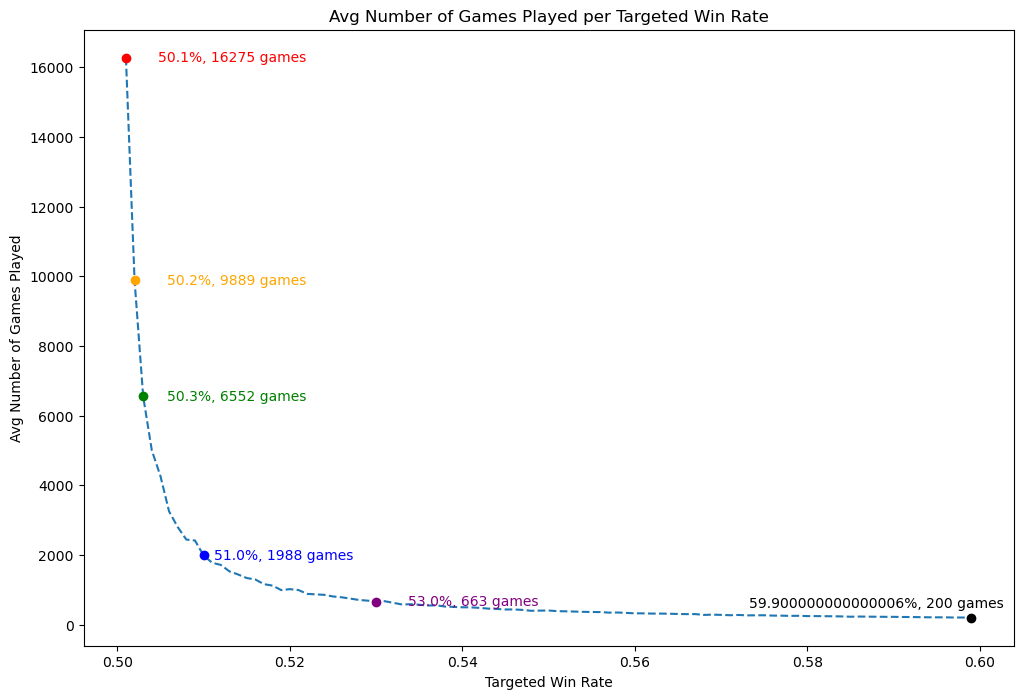

In [82]:
# https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Avg Number of Games Played per Targeted Win Rate')
ax.set_xlabel('Targeted Win Rate')
ax.set_ylabel('Avg Number of Games Played')

ax.plot(wr_list, n_avg_games_list, linestyle='--')
# ax.axhline(18000, color="red")
# ax.axhline(9000, color="orange")
# ax.axhline(6000, color="green")

# ax.axvline(wr_list[0], color='red')
# ax.axvline(wr_list[1], color='orange')
# ax.axvline(wr_list[2], color='green')

ax.plot(wr_list[0], int(n_avg_games_list[0]), color='red', marker='o')
ax.plot(wr_list[1], int(n_avg_games_list[1]), color='orange', marker='o')
ax.plot(wr_list[2], int(n_avg_games_list[2]), color='green', marker='o')
ax.plot(wr_list[9], int(n_avg_games_list[9]), color='blue', marker='o')
ax.plot(wr_list[29], int(n_avg_games_list[29]), color='purple', marker='o')
ax.plot(wr_list[-1], int(n_avg_games_list[-1]), color='black', marker='o')
# ax.plot(wr_list[1], color='orange')
# ax.plot(wr_list[2], color='green')

# Here: add a new tick with the required value
# xticks = [*ax.get_xticks(), wr_list[0], wr_list[1], wr_list[2]]
# xticklabels = [*ax.get_xticklabels(),wr_list[0], wr_list[1], wr_list[2]]

# yticks = [*ax.get_yticks(), 9000]
# yticklabels = [*ax.get_yticklabels(), int(9000)]
# ax.set_yticks(yticks, labels=yticklabels)

trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)

# ax.text(0, 9000, '9000', color='red')
ax.text(0.25, int(n_avg_games_list[0]), f"{wr_list[0]*100}%, {int(n_avg_games_list[0])} games", color="red", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[1]), f"{wr_list[1]*100}%, {int(n_avg_games_list[1])} games", color="orange", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[2]), f"{wr_list[2]*100}%, {int(n_avg_games_list[2])} games", color="green", transform=trans, ha="right", va="center")
ax.text(0.3, int(n_avg_games_list[9]), f"{wr_list[9]*100}%, {int(n_avg_games_list[9])} games", color="blue", transform=trans, ha="right", va="center")
ax.text(0.5, int(n_avg_games_list[29]), f"{wr_list[29]*100}%, {int(n_avg_games_list[29])} games", color="purple", transform=trans, ha="right", va="center")
ax.text(1, 600, f"{wr_list[-1]*100}%, {int(n_avg_games_list[-1])} games", color="black", transform=trans, ha="right", va="center")




plt.show()


In [83]:
for i in range(len(wr_list)):
    print(wr_list[i], n_avg_games_list[i])

0.501 16275.122
0.502 9889.8
0.503 6552.968
0.504 5005.22
0.505 4268.476
0.506 3252.382
0.507 2803.194
0.508 2443.734
0.509 2416.79
0.51 1988.562
0.511 1776.416
0.512 1716.216
0.513 1530.176
0.514 1440.958
0.515 1340.19
0.516 1296.862
0.517 1163.65
0.518 1121.12
0.519 992.732
0.52 1020.566
0.521 994.69
0.522 885.342
0.523 870.482
0.524 856.222
0.525 810.366
0.526 786.666
0.527 749.278
0.528 710.36
0.529 690.256
0.53 663.062
0.531 674.01
0.532 627.042
0.533 580.902
0.534 587.12
0.535 572.986
0.536 549.814
0.537 555.494
0.538 520.152
0.539 510.27
0.54 499.35
0.541 497.752
0.542 482.2
0.543 461.516
0.544 451.58
0.545 436.416
0.546 437.918
0.547 423.546
0.548 398.802
0.549 404.0
0.55 406.556
0.551 388.666
0.552 383.962
0.553 376.966
0.554 368.722
0.555 364.662
0.556 361.484
0.557 346.112
0.558 349.268
0.559 338.376
0.56 326.114
0.561 324.984
0.562 318.796
0.5630000000000001 318.658
0.5640000000000001 314.434
0.5650000000000001 307.372
0.5660000000000001 303.066
0.5670000000000001 304.23
0.